In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('dataset_2019041.csv',header=None)

In [4]:
"""
accelerometer data 100Hz

x,y,z,timestamp,activty,user

The user presses a button before and after he completed an activity. So it's better to remove some data in the beginning and the end of an activity. Or a percentage of the activity if the activity is very short. 


user mapping:
        "mirko.arnold": 1,
        "ali.reza.jafarian": 2,
        "dimitri.hauri": 3,
        "fee.riebeling": 4,
        "anina.zingg": 5,
        "nicole.lucrezia": 6,
        "karolina.klucznik": 7


activities:
        "Ankleiden": 1,    wear clothes
        "Auto fahren": 2,  drive  
        "Bett machen": 3,  sleep
        "Briefkasten leeren": 4,   empty mailbox
        "Buch oder Zeitschrift lesen": 5,   read book
        "Computerarbeit": 6,  operate computer
        "Einkäufe ausräumen": 7,  clear shopping
        "Einkaufen": 8,   shopping
        "Entkleiden": 9,    undress
        "Essen": 10,  eat
        "Gehen": 11,   walk
        "Geschirrwaschmaschine ausräumen": 12,  Clean up the dishwashing machine   
        "Geschirrwaschmaschine einräumen": 13,  Put in the dishwashing machine
        "Kochen": 14, Cook
        "Lift fahren": 15,   Drive a lift
        "Mobile benutzen und surfen oder chatten": 16, Use mobile and surf or chat
        "Putzen": 17,    ploish shoes
        "TV schauen": 18,   watch TV
        "Zähne putzen": 19   Brush teeth

"""

'\naccelerometer data 100Hz\n\nx,y,z,timestamp,activty,user\n\nThe user presses a button before and after he completed an activity. So it\'s better to remove some data in the beginning and the end of an activity. Or a percentage of the activity if the activity is very short. \n\n\nuser mapping:\n        "mirko.arnold": 1,\n        "ali.reza.jafarian": 2,\n        "dimitri.hauri": 3,\n        "fee.riebeling": 4,\n        "anina.zingg": 5,\n        "nicole.lucrezia": 6,\n        "karolina.klucznik": 7\n\n\nactivities:\n        "Ankleiden": 1,    wear clothes\n        "Auto fahren": 2,  drive  \n        "Bett machen": 3,  sleep\n        "Briefkasten leeren": 4,   empty mailbox\n        "Buch oder Zeitschrift lesen": 5,   read book\n        "Computerarbeit": 6,  operate computer\n        "Einkäufe ausräumen": 7,  \n        "Einkaufen": 8,   shopping\n        "Entkleiden": 9,    undress\n        "Essen": 10,  eat\n        "Gehen": 11,   walk\n        "Geschirrwaschmaschine ausräumen": 12,  

In [5]:
df.head()

,0,1,2,3,4,5
0,-0.951225,-0.399994,0.022216,2019-03-26 07:30:10.003,10,6
1,-0.951225,-0.399994,0.022216,2019-03-26 07:30:10.012,10,6
2,-0.951225,-0.349995,0.022216,2019-03-26 07:30:10.022,10,6
3,-0.951225,-0.399994,0.022216,2019-03-26 07:30:10.032,10,6
4,-0.951225,-0.399994,-0.022228,2019-03-26 07:30:10.041,10,6


In [6]:
df.columns = ['x', 'y' , 'z' , 'timestamp' , 'activity' , 'user']

In [7]:
df.head()

,x,y,z,timestamp,activity,user
0,-0.951225,-0.399994,0.022216,2019-03-26 07:30:10.003,10,6
1,-0.951225,-0.399994,0.022216,2019-03-26 07:30:10.012,10,6
2,-0.951225,-0.349995,0.022216,2019-03-26 07:30:10.022,10,6
3,-0.951225,-0.399994,0.022216,2019-03-26 07:30:10.032,10,6
4,-0.951225,-0.399994,-0.022228,2019-03-26 07:30:10.041,10,6


In [8]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [9]:
print('Shape of the data set: ' + str(df.shape))

Shape of the data set: (23069658, 6)


In [10]:
#check for missing values
Temp = pd.DataFrame(df.isnull().sum())
Temp.columns = ['Sum']
print('Amount of rows with missing values: ' + str(len(Temp.index[Temp['Sum'] > 0])) )

Amount of rows with missing values: 0


In [11]:
df.head()

,x,y,z,timestamp,activity,user
0,-0.951225,-0.399994,0.022216,2019-03-26 07:30:10.003,10,6
1,-0.951225,-0.399994,0.022216,2019-03-26 07:30:10.012,10,6
2,-0.951225,-0.349995,0.022216,2019-03-26 07:30:10.022,10,6
3,-0.951225,-0.399994,0.022216,2019-03-26 07:30:10.032,10,6
4,-0.951225,-0.399994,-0.022228,2019-03-26 07:30:10.041,10,6


In [12]:
df.tail()

,x,y,z,timestamp,activity,user
23069653,-0.799212,0.300781,-0.357572,2019-04-10 08:14:49.959,6,7
23069654,-0.814960,0.285156,-0.345451,2019-04-10 08:14:49.969,6,7
23069655,-0.822834,0.277344,-0.337371,2019-04-10 08:14:49.979,6,7
23069656,-0.834645,0.265625,-0.333330,2019-04-10 08:14:49.989,6,7
23069657,-0.846456,0.257812,-0.321209,2019-04-10 08:14:49.999,6,7


# Data Points Per User

In [13]:
data_points_per_user = df.groupby(['user']).count()

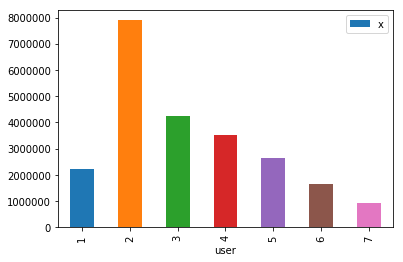

In [14]:
data_points_per_user.plot.bar(y='x')

# Activities Per User

1. wear clothes
2. drive  
3. sleep
4. empty mailbox
5. read book
6. operate computer
7. clear shopping
8. shopping
9. undress
10. eat
11. walk
12. Clean up the dishwashing machine   
13. Put in the dishwashing machine
14. Cook
15. Drive a lift
16. Use mobile and surf or chat
17. ploish shoes
18. watch TV
19. Brush teeth


In [15]:
activites_per_user = df.groupby(['user','activity']).count()

In [16]:
activites_per_user

x        y        z  timestamp
user activity                                      
1    1            4045     4045     4045       4045
     3            3969     3969     3969       3969
     4            4065     4065     4065       4065
     6         1762439  1762439  1762439    1762439
     7           16240    16240    16240      16240
     8           58788    58788    58788      58788
     10         262835   262835   262835     262835
     11          40528    40528    40528      40528
     14          46606    46606    46606      46606
     17          16214    16214    16214      16214
     19          24301    24301    24301      24301
2    1           14218    14218    14218      14218
     3           26308    26308    26308      26308
     6         1568162  1568162  1568162    1568162
     8           58644    58644    58644      58644
     9           10140    10140    10140      10140
     10         834289   834289   834289     834289
     11         200201   200201   200201     200201
     14         165641   165641   165641     165641
     17         191719   191719   191719     191719
     18        4752919  4752919  4752919    4752919
     19          70701    70701    70701      70701
3    1           58118    58118    58118      58118
     3            8299     8299     8299       8299
     4            6724     6724     6724       6724
     5          257087   257087   257087     257087
     6          903652   903652   903652     903652
     7          125903   125903   125903     125903
     8          830006   830006   830006     830006
     9           22669    22669    22669      22669
...                ...      ...      ...        ...
6    4            4181     4181     4181       4181
     5          194404   194404   194404     194404
     6          677107   677107   677107     677107
     7           10324    10324    10324      10324
     8           41430    41430    41430      41430
     9            4137     4137     4137       4137
     10         150720   150720   150720     150720
     11         147513   147513   147513     147513
     13          37210    37210    37210      37210
     14         121925   121925   121925     121925
     15           4140     4140     4140       4140
     16          82748    82748    82748      82748
     17         103254   103254   103254     103254
     19          45479    45479    45479      45479
7    1            4062     4062     4062       4062
     2          257858   257858   257858     257858
     3            4042     4042     4042       4042
     5          143226   143226   143226     143226
     6          100756   100756   100756     100756
     7           10097    10097    10097      10097
     8           82715    82715    82715      82715
     10          64557    64557    64557      64557
     11          40579    40579    40579      40579
     12           4039     4039     4039       4039
     13           4054     4054     4054       4054
     14          46428    46428    46428      46428
     15           4038     4038     4038       4038
     16         119405   119405   119405     119405
     17          28318    28318    28318      28318
     19          10102    10102    10102      10102

[84 rows x 4 columns]

## Count of activities of  user:1 Mirko Arnold

Arnold has spent more time operating computer.

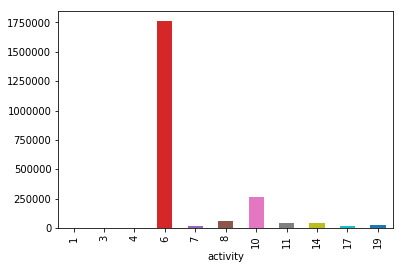

In [92]:

activities_user_1 = df.loc[df['user']==1].groupby(['activity']).count()['x']
activities_user_1.plot.bar()


In [67]:
total = activities_user_1.shape[0]



,x,y,z,timestamp,user
activity,,,,,
1,4045,4045,4045,4045,4045
3,3969,3969,3969,3969,3969
4,4065,4065,4065,4065,4065
6,1762439,1762439,1762439,1762439,1762439
7,16240,16240,16240,16240,16240
8,58788,58788,58788,58788,58788
10,262835,262835,262835,262835,262835
11,40528,40528,40528,40528,40528
14,46606,46606,46606,46606,46606


## Count of activities of  user:2 Ali Reza Jafarian

Jafarian has spent mpre time watching TV.

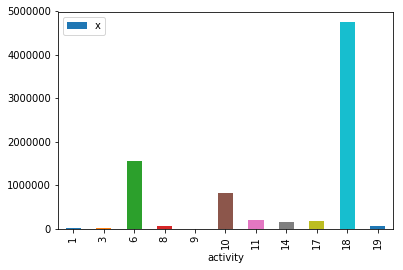

In [26]:
## Count of activities of  user:2

activities_user_2 = df.loc[df['user']==2,:].groupby(['activity']).count()
activities_user_2.plot.bar(y='x')

## Count of activities of  user:3 Dimitri Hauri
Hauri has spent more time operating computer, shopping and eating.

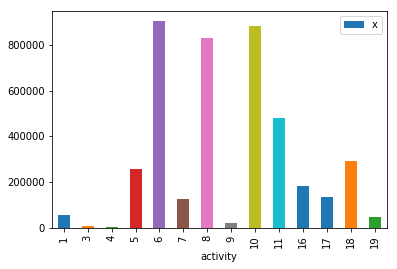

In [28]:
## Count of activities of  user:3

activities_user_3 = df.loc[df['user']==3,:].groupby(['activity']).count()
activities_user_3.plot.bar(y='x')

## Count of activities of  user:4 Fee Riebeling

Riebeling has spent more time operating computer and walking


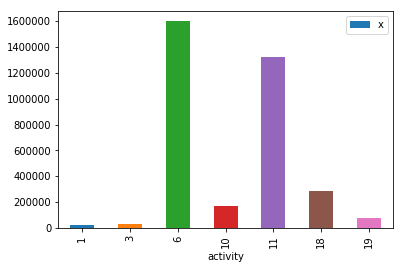

In [29]:
## Count of activities of  user:4

activities_user_4 = df.loc[df['user']==4,:].groupby(['activity']).count()
activities_user_4.plot.bar(y='x')

## Count of activities of  user:5 Anina Zingg

Zingg has spent more time driving, walking and polishing shoes.


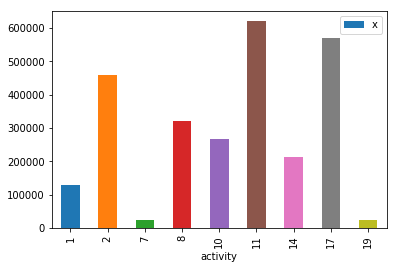

In [30]:
## Count of activities of  user:5

activities_user_5 = df.loc[df['user']==5,:].groupby(['activity']).count()
activities_user_5.plot.bar(y='x')

## Count of activities of  user:6 Nicole Lucrezia

Lucrezia has done almost every activity and has spent more time opearting computer.

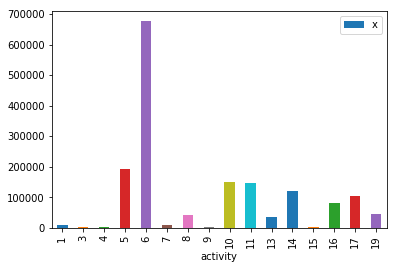

In [31]:
## Count of activities of  user:6

activities_user_6 = df.loc[df['user']==6,:].groupby(['activity']).count()
activities_user_6.plot.bar(y='x')

## Count of activities of  user:7 Karolina Klucznik

Klucznik has done almost every activity and has spent more time driving.

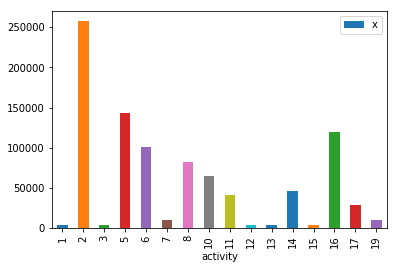

In [32]:
## Count of activities of  user:7

activities_user_7 = df.loc[df['user']==7,:].groupby(['activity']).count()
activities_user_7.plot.bar(y='x')

In [45]:
df = df.set_index(df['timestamp'])

In [47]:
df.head()

,x,y,z,timestamp,activity,user
timestamp,,,,,,
2019-03-26 07:30:10.003,-0.951225,-0.399994,0.022216,2019-03-26 07:30:10.003,10,6
2019-03-26 07:30:10.012,-0.951225,-0.399994,0.022216,2019-03-26 07:30:10.012,10,6
2019-03-26 07:30:10.022,-0.951225,-0.349995,0.022216,2019-03-26 07:30:10.022,10,6
2019-03-26 07:30:10.032,-0.951225,-0.399994,0.022216,2019-03-26 07:30:10.032,10,6
2019-03-26 07:30:10.041,-0.951225,-0.399994,-0.022228,2019-03-26 07:30:10.041,10,6


In [52]:
tmp = df.loc['2019-03-26']

In [53]:
tmp.tail()

,x,y,z,timestamp,activity,user
timestamp,,,,,,
2019-03-26 22:25:49.959,0.121944,0.049999,-0.466669,2019-03-26 22:25:49.959,9,6
2019-03-26 22:25:49.968,0.121944,0.099998,-0.288893,2019-03-26 22:25:49.968,9,6
2019-03-26 22:25:49.978,0.073164,0.099998,-0.200005,2019-03-26 22:25:49.978,9,6
2019-03-26 22:25:49.988,0.073164,0.149998,-0.200005,2019-03-26 22:25:49.988,9,6
2019-03-26 22:25:49.997,0.073164,0.099998,-0.333337,2019-03-26 22:25:49.997,9,6


In [55]:
num_rows = tmp[(tmp.activity==10) & (tmp.user == 6)].shape[0]

ten_pc = int((num_rows/100)*10)

tmp = tmp.drop(tmp.index[0:ten_pc])
tmp = tmp.drop(tmp.index[ten_pc:-1])



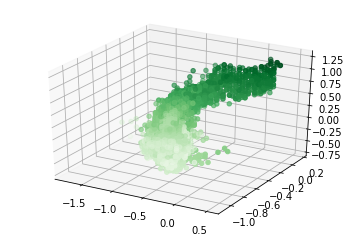

In [59]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
ax = plt.axes(projection='3d')

data_per_act_user = tmp[(tmp.activity==10) & (tmp.user == 6)]

# Data for three-dimensional scattered points
zdata = data_per_act_user['z']
xdata = data_per_act_user['x']
ydata = data_per_act_user['y']
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');



In [63]:
tmp2 = df.loc['2019-03-28']

In [64]:
num_rows2 = tmp2[(tmp2.activity==11) & (tmp2.user == 4)].shape[0]

ten_pc2 = int((num_rows2/100)*10)

tmp2 = tmp2.drop(tmp2.index[0:ten_pc2])
tmp2 = tmp2.drop(tmp2.index[ten_pc2:-1])



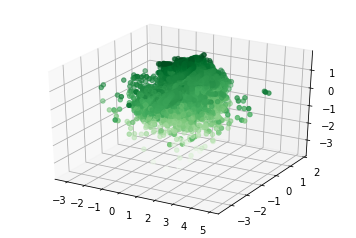

In [65]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
ax = plt.axes(projection='3d')

data_per_act_user2 = tmp2[(tmp2.activity==11) & (tmp2.user == 4)]

# Data for three-dimensional scattered points
zdata = data_per_act_user2['z']
xdata = data_per_act_user2['x']
ydata = data_per_act_user2['y']
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');



In [96]:
df.groupby('activity').count()

,x,y,z,timestamp,user
activity,,,,,
1,247016,247016,247016,247016,247016
2,717034,717034,717034,717034,717034
3,75115,75115,75115,75115,75115
4,14970,14970,14970,14970,14970
5,594717,594717,594717,594717,594717
6,6612618,6612618,6612618,6612618,6612618
7,185255,185255,185255,185255,185255
8,1392864,1392864,1392864,1392864,1392864
9,36946,36946,36946,36946,36946


In [109]:
df[(df.user == 1)&(df.activity == 3)]['activity'].count()

3969

Generating statistics for given  19  activities...

Number of unique activities performed in total are: 
Unique activities performed in total are: 
 activity
1      247016
2      717034
3       75115
4       14970
5      594717
6     6612618
7      185255
8     1392864
9       36946
10    2631187
11    2851784
12       4039
13      41264
14     592846
15       8178
16     387547
17    1043911
18    5336441
19     295926
Name: x, dtype: int64
Generating statistics for given  7  users...

Number of unique users performed in total are:  7
Unique users in total are: 
 user
1    2240030
2    7892942
3    4237162
4    3507560
5    2628647
6    1639041
7     924276
Name: x, dtype: int64 



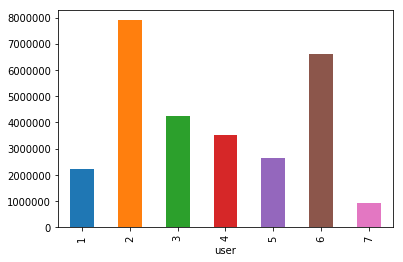

In [122]:
all_activities = ["Ankleiden","Auto fahren","Bett machen","Briefkasten leeren","Buch oder Zeitschrift lesen","Computerarbeit","Einkäufe ausräumen",
"Einkaufen","Entkleiden","Essen","Gehen","Geschirrwaschmaschine ausräumen","Geschirrwaschmaschine einräumen","Kochen","Lift fahren","Mobile benutzen und surfen oder chatten",
"Putzen","TV schauen","Zähne putzen"]

activities_mapping =  {"Ankleiden": 1,
        "Auto fahren": 2,
        "Bett machen": 3,
        "Briefkasten leeren": 4,
        "Buch oder Zeitschrift lesen": 5,
        "Computerarbeit": 6,
        "Einkäufe ausräumen": 7,
        "Einkaufen": 8,
        "Entkleiden": 9,
        "Essen": 10,
        "Gehen": 11,
        "Geschirrwaschmaschine ausräumen": 12,
        "Geschirrwaschmaschine einräumen": 13,
        "Kochen": 14,
        "Lift fahren": 15,
        "Mobile benutzen und surfen oder chatten": 16,
        "Putzen": 17,
        "TV schauen": 18,
        "Zähne putzen": 19}

def plotStatistics(users=[1,2,3,4,5,6,7], activities=all_activities, offsetInPercent=10):
        print('Generating statistics for given ',len(activities),' activities...\n')
        activities_ids =  [  activities_mapping[x]  for x in all_activities]
        num_unique_activities = df['activity'].nunique()
        print('Number of unique activities performed in total are: ')
        #display(num_unique_activities)
        unique_activities = df.groupby('activity').count()['x']
        print('Unique activities performed in total are: \n',unique_activities)
        unique_activities.plot.bar(y='x')
        
        print('Generating statistics for given ',len(users),' users...\n')
        num_unique_users = df['user'].nunique()
        print('Number of unique users performed in total are: ',num_unique_users)
        unique_users = df.groupby('user').count()['x']
        print('Unique users in total are: \n',unique_users,'\n')
        unique_users.plot.bar(y='x')
        
        

        
plotStatistics()



In [121]:
from IPython.display import display
display(df)


,x,y,z,timestamp,activity,user
timestamp,,,,,,
2019-03-26 07:30:10.003,-0.951225,-0.399994,0.022216,2019-03-26 07:30:10.003,10,6
2019-03-26 07:30:10.012,-0.951225,-0.399994,0.022216,2019-03-26 07:30:10.012,10,6
2019-03-26 07:30:10.022,-0.951225,-0.349995,0.022216,2019-03-26 07:30:10.022,10,6
2019-03-26 07:30:10.032,-0.951225,-0.399994,0.022216,2019-03-26 07:30:10.032,10,6
2019-03-26 07:30:10.041,-0.951225,-0.399994,-0.022228,2019-03-26 07:30:10.041,10,6
2019-03-26 07:30:10.051,-0.902445,-0.349995,-0.066672,2019-03-26 07:30:10.051,10,6
2019-03-26 07:30:10.061,-1.000006,-0.399994,-0.022228,2019-03-26 07:30:10.061,10,6
2019-03-26 07:30:10.070,-1.048786,-0.349995,-0.022228,2019-03-26 07:30:10.070,10,6
2019-03-26 07:30:10.080,-1.048786,-0.299995,0.066660,2019-03-26 07:30:10.080,10,6


In [ ]:
        for user in users:            
            for activity_id in activities_ids:
                activites_per_user[user][activity_id] = df[(df.user == user)&(df.activity == activity_id)]['activity'].count()
                
